In [15]:
from model.model import create_multi_unet_model
from tensorflow.python.keras.utils.np_utils import to_categorical, normalize
import matplotlib.pyplot as plt
from preprocess.tools import resize_dicom
import numpy as np
from random import shuffle, randint
import os
from sklearn.model_selection import train_test_split

In [16]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
img_dims = (IMG_WIDTH, IMG_HEIGHT)
n_classes = 16
n_images_to_load = 5  #number of images to load due to lack of resources

In [17]:
train_images = []
train_images_path = "../data/train/img"
train_masks = []
train_masks_path = "../data/train/msk"

In [18]:
indexes = list(range(n_images_to_load))
shuffle(indexes)

In [19]:
for i in range(n_images_to_load):
    msk = os.listdir(train_masks_path)[i]
    msk_path = os.path.join(train_masks_path, msk)
    train_masks.append(resize_dicom(msk_path, IMG_WIDTH, IMG_HEIGHT))

In [20]:
for i in range(n_images_to_load):
    img = os.listdir(train_images_path)[i]
    img_path = os.path.join(train_images_path, img)
    train_images.append(resize_dicom(img_path, IMG_WIDTH, IMG_HEIGHT))

In [21]:
train_images = np.array(train_images)
train_masks = np.array(train_masks)

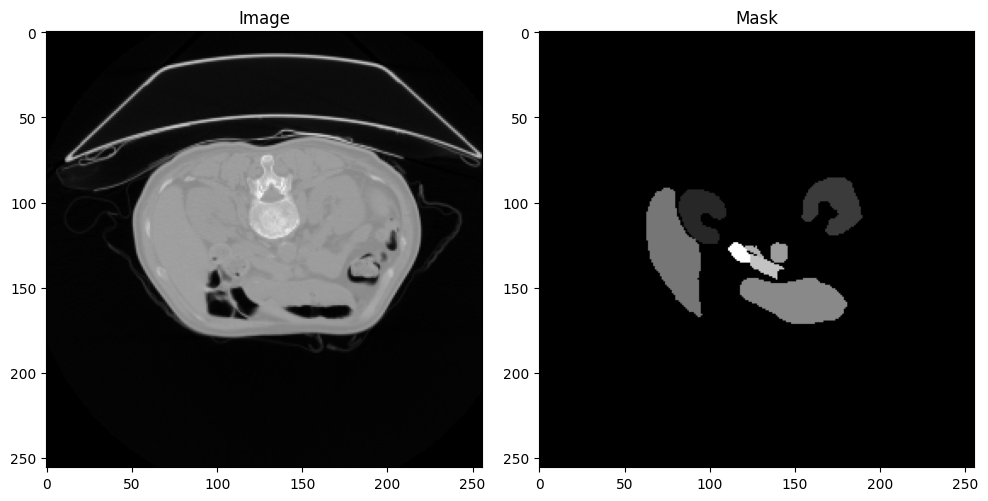

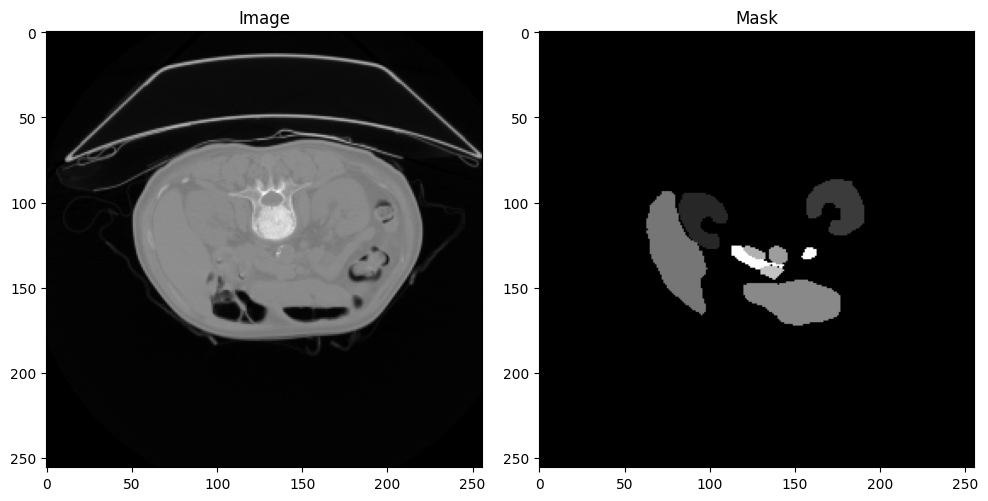

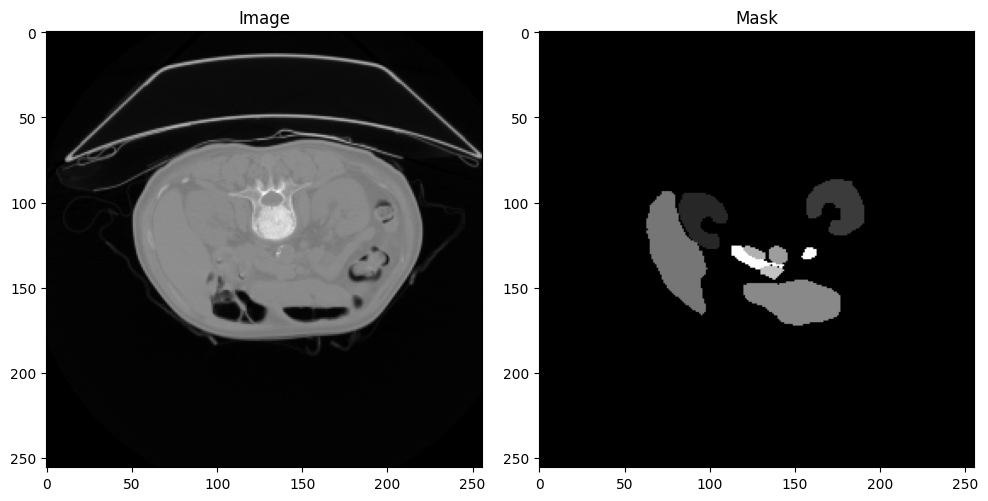

In [22]:
def display_random_image_and_mask():
    random_index = randint(0, n_images_to_load - 1)
    ig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(train_images[random_index], cmap="gray")
    axes[0].set_title("Image")
    axes[1].imshow(train_masks[random_index], cmap="gray")
    axes[1].set_title("Mask")
    plt.tight_layout()
    plt.show()

for i in range(3):
    display_random_image_and_mask()

In [23]:
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)
train_masks_input = np.expand_dims(train_masks, axis=3)

In [24]:
X1, X_test, y1, y_test = train_test_split(train_images, train_masks, test_size=0.20, random_state=0)

In [25]:
train_masks_cat = to_categorical(y1, num_classes=n_classes)
test_masks_cat = to_categorical(y_test, num_classes=n_classes)

In [26]:
model = create_multi_unet_model(n_classes=n_classes, img_width=IMG_WIDTH, img_height=IMG_HEIGHT, kernel_size=(3, 3))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 256, 256, 16) 0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 16) 2320        dropout_9[0][0]                  
____________________________________________________________________________________________

In [27]:
history = model.fit(X1, train_masks_cat, batch_size=32, verbose=1, epochs=25, validation_data=(X_test, test_masks_cat), shuffle=False)

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

In [ ]:
model.save("CT_model.hdf5")